# XGBoost
## 1. 모델 소개
---
XGBoost (Extreme Gradient Boosting) 는 2016년 Tianqi Chen이 개발한 그래디언트 부스팅(Gradient Boosting) 프레임워크입니다. 기존 부스팅 모델의 학습 속도, 메모리 효율, 일반화 성능을 극대화하도록 설계되어, 캐글(Kaggle) 등 데이터 분석 대회에서 가장 많이 사용되는 모델 중 하나입니다.
## 2. 주요 특징
---
### Regularized Objective Function (정규화 목적함수)
일반 그레이디언트 부스팅과 달리 XGBoost는 학습 목표의 일부로 정규화를 포함합니다.    

이로써 과적합(Overfitting) 방지와 모델의 일반화 성능 향상을 동시에 달성합니다.
### Sparsity-aware Algorithm (희소 데이터 최적화)
XGBoost는 결측치(missing value) 또는 희소(sparse) 데이터에서도 효율적으로 동작하도록‘Sparsity-aware Split Finding Algorithm’을 도입했습니다.  
- 각 노드에서 결측값을 왼쪽/오른쪽 중 어느 쪽으로 보낼지 자동 학습
- 데이터가 희소할수록 연산량이 줄어들며, dense한 모델보다 빠른 학습 속도를 달성
### Parallel & Distributed Learning (병렬 및 분산 학습)
XGBoost는 CPU 멀티스레딩을 활용한 병렬 학습(Parallel learning) 과
클러스터 기반의 분산 학습(Distributed learning) 을 모두 지원합니다.

- Column Block 구조로 각 피처별 정렬을 사전 수행 → 분할 탐색을 선형 시간에 처리

- Cache-aware Access 를 적용하여 CPU 캐시 미스(Cache miss)를 최소화

- Out-of-core Computing: 디스크에 데이터를 나눠 저장하고, 압축·샤딩을 통해 메모리를 초과하는 대용량 데이터도 학습 가능
## 3. 참고 자료
---
- 논문: XGBoost: A Scalable Tree Boosting System
- 저자: Tianqi Chen, Carlos Guestrin
- 학회: KDD 2016 (The 22nd ACM SIGKDD Conference on Knowledge Discovery and Data Mining)
- 논문 링크: https://dl.acm.org/doi/10.1145/2939672.2939785

In [1]:
# library & install
from google.colab import drive
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# mount & file upload
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/dataset-2025.zip"

extract_path = '/content/drive/MyDrive/boiler-system-data/dataset-2025'
#with zipfile.ZipFile(zip_path, 'r') as z:
#   z.extractall(extract_path)
csv_files = glob.glob(os.path.join(extract_path, "*.csv"))
print("불러온 CSV 개수:", len(csv_files))


Mounted at /content/drive
불러온 CSV 개수: 257


In [3]:
# Create an empty list to store dataframes
valid_dataframes = []

# Read each csv file into a dataframe and append to the list
for file in csv_files:
    # Check if the file is empty
    if os.stat(file).st_size == 0:
        print(f"Skipping empty file: {file}")
        continue

    try:
        # Read the CSV, explicitly not setting the first column as index
        # Use header=0 to ensure the first row is treated as the header
        df = pd.read_csv(file, encoding='cp949', index_col=None, header=0, low_memory=False)

        # Check if the dataframe is empty after reading
        if not df.empty:
            valid_dataframes.append(df)
        else:
            print(f"Empty dataframe after reading file: {file}")

    except Exception as e:
        print(f"Error reading file {file}: {e}")


# Combine only the valid DataFrames
if valid_dataframes:
    # Use concat with keys to keep track of original file if needed for debugging, though not displayed
    combined_df = pd.concat(valid_dataframes, ignore_index=True)
    # Display the head of the combined dataframe
else:
    combined_df = pd.DataFrame()  # Empty DataFrame if no valid files found
    print("No valid dataframes to combine.")

combined_df = combined_df.reset_index()
combined_df = combined_df.shift(periods=1, axis=1)
combined_df = combined_df.drop(columns=['index'])

display(combined_df.head())

Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-01-06.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-01-07.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-01-08.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-01-09.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-01-29.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-01-30.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-01-31.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-02-01.csv
Empty dataframe after reading file: /content/drive/MyDrive/boiler-system-data/dataset-2025/28_2025-02-02.csv
Empty dataframe aft

,생성일,부하율,설정 압력,보일러 압력,송풍기 인버터 출력,송풍기 입력,급수 펌프,급수펌프 입력,가스 댐퍼,가스 댐퍼 입력,...,운전시간,정상 운전 확률,송풍기 고장 확률,AIR 댐퍼 고장 확률,GAS 앰퍼 고장 확률,확률 업데이트 시간,순간 스팀량,입출력법 효율,열 손실법 효율,효율(입출력법-스팀)
0,0,60.0,5.6,5.4,69.0,59.2,0.0,0,30.0,30.5,...,9270:47,0.40,14.59,56.44,28.57,2024-12-31 23:59:01,2.4,120.77,94.14,133.85
1,1,60.0,5.6,5.4,69.0,59.3,0.0,0,30.0,30.8,...,9270:47,0.53,22.45,76.87,0.16,2025-01-01 00:00:01,2.2,127.72,94.15,122.69
2,2,60.0,5.6,5.4,69.0,59.2,0.0,0,30.0,30.8,...,9270:47,0.53,22.45,76.87,0.16,2025-01-01 00:00:01,2.2,127.11,94.15,122.11
3,3,60.0,5.6,5.4,69.0,59.3,75.0,0,30.0,30.8,...,9270:48,0.53,22.45,76.87,0.16,2025-01-01 00:00:01,2.3,101.49,94.15,128.76
4,4,60.0,5.6,5.4,69.0,59.2,75.0,0,30.0,30.6,...,9270:48,0.53,22.45,76.87,0.16,2025-01-01 00:00:01,2.4,88.79,94.16,134.49


## Data preprocessing

In [4]:
# Rename
combined_df.columns=["Creation date", "load factor", "Set Pressure", "Boiler Pressure",
                      "Blower Inverter Output", "Blower Input", "Water Supply Pump",
                      "Water Supply Pump Input", "Gas Damper", "Gas Damper Input",
                      "Air Damper", "Air Damper Input", "Recirculation Damper",
                      "Recirculation External Damper", "Recirculation Damper Input",
                      "Recirculation External Damper Input", "Water Supply Level",
                      "Boiler Temperature", "Exhaust Gas Temperature 1",
                      "Exhaust Gas Temperature 2", "Exhaust Gas Temperature 3",
                      "Exhaust Recirculation Temperature", "Economizer Temperature 1",
                      "Economizer Temperature 2", "Burner Temperature", "Exhaust Gas NOx",
                      "Exhaust Gas O2", "Recirculation O2", "Recirculation NOx",
                      "Water Supply Amount (Cumulative Flow)",
                      "Water Supply Amount (Instantaneous Flow)",
                      "Fuel Amount (Cumulative Flow)", "Fuel Amount (Instantaneous Flow)",
                      "Efficiency (Instantaneous)", "Power Consumption", "Vibration Sensor 1",
                      "Vibration Sensor 2", "Operating Time", "Normal Operation Probability",
                      "Blower Failure Probability", "Air Damper Failure Probability",
                      "Gas Damper Failure Probability", "Probability Update Time",
                      "Instantaneous Steam Amount", "Input-Output Efficiency",
                      "Heat Loss Efficiency", "Efficiency (input/output method-steam)"]

combined_df = combined_df.reset_index(drop=True)

# Drop unnecessary columns
combined_df = combined_df.drop(columns= [
    "Creation date", "Exhaust Recirculation Temperature", "Burner Temperature", "Power Consumption", "Vibration Sensor 1",
    "Vibration Sensor 2", "Operating Time", "Normal Operation Probability", "Blower Failure Probability", "Air Damper Failure Probability",
    "Gas Damper Failure Probability", "Probability Update Time", "Instantaneous Steam Amount", "Input-Output Efficiency",
    "Heat Loss Efficiency", "Efficiency (input/output method-steam)"
])
display(combined_df.head())

,load factor,Set Pressure,Boiler Pressure,Blower Inverter Output,Blower Input,Water Supply Pump,Water Supply Pump Input,Gas Damper,Gas Damper Input,Air Damper,...,Economizer Temperature 2,Exhaust Gas NOx,Exhaust Gas O2,Recirculation O2,Recirculation NOx,Water Supply Amount (Cumulative Flow),Water Supply Amount (Instantaneous Flow),Fuel Amount (Cumulative Flow),Fuel Amount (Instantaneous Flow),Efficiency (Instantaneous)
0,60.0,5.6,5.4,69.0,59.2,0.0,0,30.0,30.5,35.0,...,71.1,18.0,5.9,0,0,11821.64,3.13,916908.0,104.7,174.66
1,60.0,5.6,5.4,69.0,59.3,0.0,0,30.0,30.8,35.0,...,70.9,18.0,5.9,0,0,11821.64,3.31,916908.0,104.7,184.62
2,60.0,5.6,5.4,69.0,59.2,0.0,0,30.0,30.8,35.0,...,70.9,18.0,5.9,0,0,11821.64,3.31,916908.0,105.2,183.74
3,60.0,5.6,5.4,69.0,59.3,75.0,0,30.0,30.8,35.0,...,70.8,18.0,5.9,0,0,11821.64,2.62,916908.0,104.3,146.73
4,60.0,5.6,5.4,69.0,59.2,75.0,0,30.0,30.6,35.0,...,70.7,17.0,5.9,0,0,11821.65,2.29,916909.0,104.2,128.41


### Data Visualization

load factor                                 float64
Set Pressure                                float64
Boiler Pressure                             float64
Blower Inverter Output                      float64
Blower Input                                float64
Water Supply Pump                           float64
Water Supply Pump Input                       int64
Gas Damper                                  float64
Gas Damper Input                            float64
Air Damper                                  float64
Air Damper Input                            float64
Recirculation Damper                        float64
Recirculation External Damper               float64
Recirculation Damper Input                  float64
Recirculation External Damper Input         float64
Water Supply Level                          float64
Boiler Temperature                          float64
Exhaust Gas Temperature 1                   float64
Exhaust Gas Temperature 2                    object
Exhaust Gas 

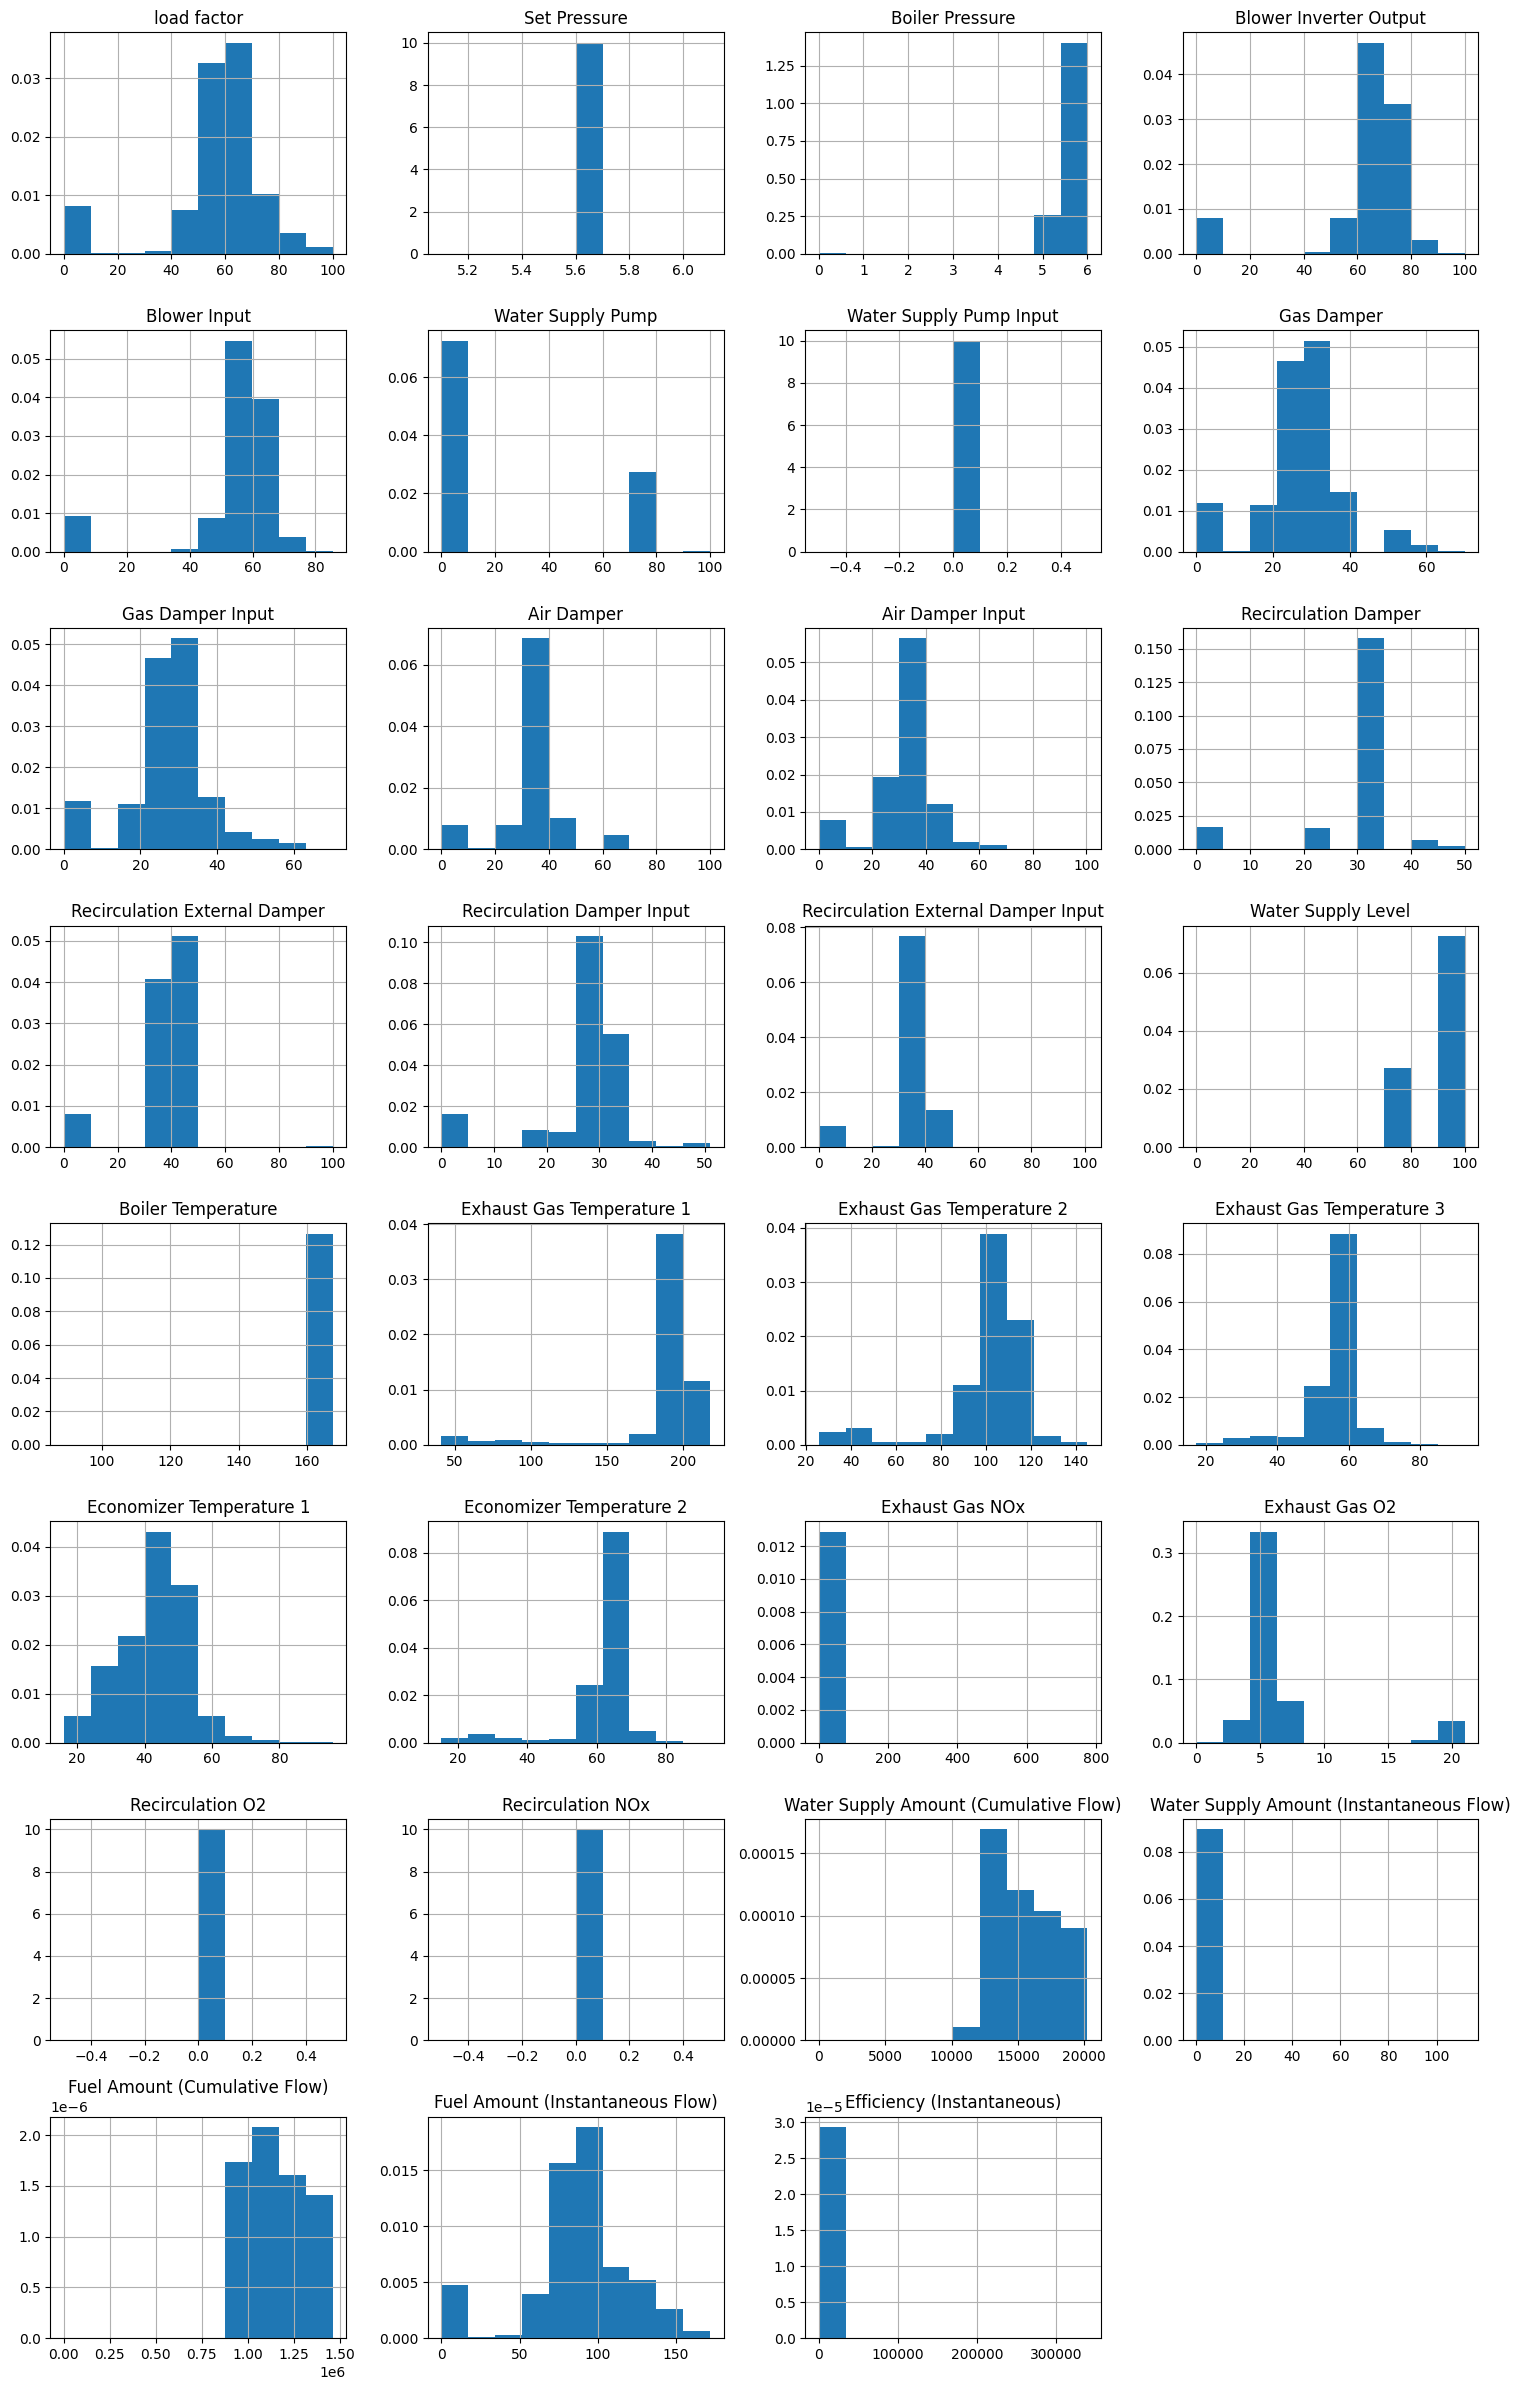

In [5]:
# Display the data types of each column in the DataFrame to confirm changes
print(combined_df.dtypes)

# Identify object type columns
object_cols = combined_df.select_dtypes(include=['object']).columns

# Convert object type columns to numeric, coercing errors to NaN
for col in object_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Get the number of columns in the DataFrame
n_cols = len(combined_df.columns)

# Calculate the number of rows needed for subplots (4 columns per row)
n_rows = (n_cols + 3) // 4

# Create a figure and a set of subplots
fig = plt.figure(figsize=(15, 3*n_rows))

# Iterate through each column and create a histogram
for i, col in enumerate(combined_df.columns, 1):
    plt.subplot(n_rows, 4, i)
    # Drop NaN values for plotting, as hist() cannot handle them
    combined_df[col].dropna().hist(density=True)
    plt.title(col)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plots
plt.show()

In [6]:
# select numeric columns
num_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# handle missing values: fill with median
combined_df[num_cols] = combined_df[num_cols].fillna(combined_df[num_cols].median())

# separate features and target
y_col = 'Efficiency (Instantaneous)'
X = combined_df.drop(columns=[y_col])
y = combined_df[y_col]


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## XGBoost Model

In [7]:
!pip install xgboost

In [8]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Set hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1)
}

# Configure Randomized Search
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of combinations to try
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Run Randomized Search
random_search.fit(X_train, y_train)

# Print best parameters
print("Best hyperparameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'subsample': np.float64(0.7999999999999999), 'n_estimators': np.int64(450), 'max_depth': np.int64(6), 'learning_rate': 0.1, 'colsample_bytree': np.float64(0.7999999999999999)}


In [15]:
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize XGBoost model with best hyperparameters from Randomized Search
xgb_model = XGBRegressor(
    objective='reg:squarederror', # Added objective
    n_estimators=450,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.7999999999999999, # Subsample ratio of the training instances
    colsample_bytree=0.7999999999999999, # Subsample ratio of columns when constructing each tree
    random_state=42 # For reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# 모델 평가 (Model Evaluation)
print("Train R2:", xgb_model.score(X_train, y_train))
print("Test R2:", xgb_model.score(X_test, y_test))

# Calculate and print Mean Squared Error (MSE)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nTrain MSE:", train_mse)
print("Test MSE:", test_mse)

# Calculate and print Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTrain MAE:", train_mae)
print("Test MAE:", test_mae)

# Calculate and print Root Mean Squared Error (RMSE)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("\nTrain RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate and print Mean Absolute Percentage Error (MAPE)
# Avoid division by zero for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Calculate percentage error only for non-zero true values
    non_zero_mask = y_true != 0
    if np.sum(non_zero_mask) == 0:
        return np.nan # Return NaN if no non-zero true values to avoid division by zero in mean
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100


train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print("\nTrain MAPE:", train_mape)
print("Test MAPE:", test_mape)


# show most important features (특성 중요도 표시)
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print(importance.head(10))

Train R2: 0.9992981559930326
Test R2: 0.9971120266226522

Train MSE: 38149.54122024105
Test MSE: 159756.68706023064

Train MAE: 12.66834454674687
Test MAE: 15.182052507464482

Train RMSE: 195.3190754131328
Test RMSE: 399.6957431099694

Train MAPE: 5.2277946190180975
Test MAPE: 5.287266899989332
                                     feature  importance
15                        Water Supply Level    0.303428
29          Fuel Amount (Instantaneous Flow)    0.226423
3                     Blower Inverter Output    0.127696
5                          Water Supply Pump    0.119790
17                 Exhaust Gas Temperature 1    0.082438
27  Water Supply Amount (Instantaneous Flow)    0.045827
28             Fuel Amount (Cumulative Flow)    0.018857
20                  Economizer Temperature 1    0.017966
26     Water Supply Amount (Cumulative Flow)    0.013670
21                  Economizer Temperature 2    0.009797


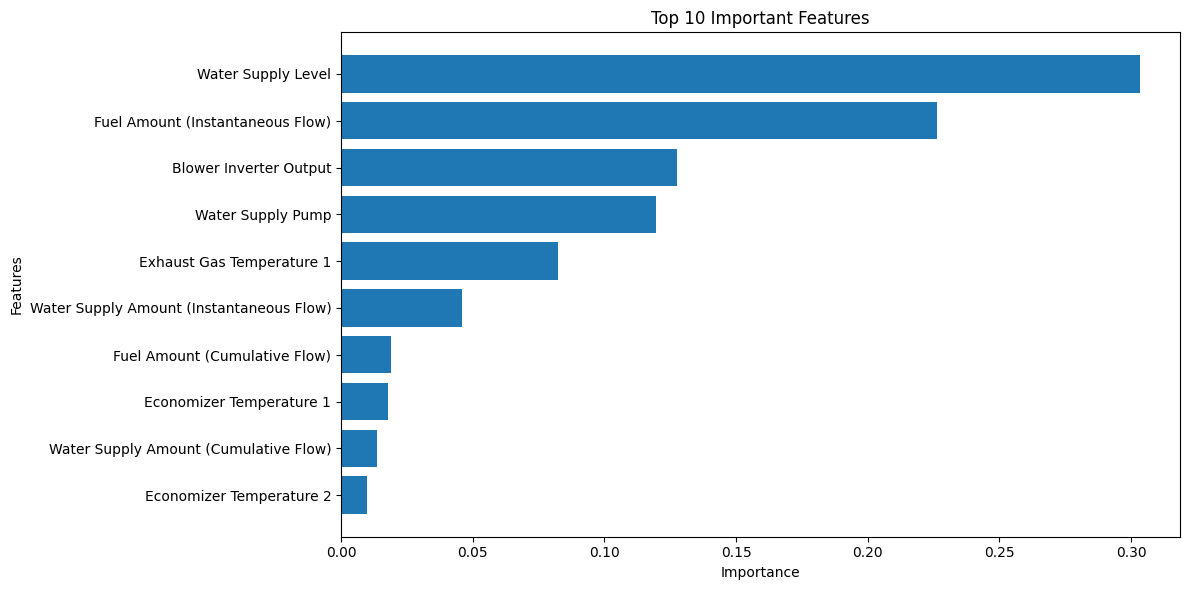

In [14]:
# Select the top 10 important features (or adjust the number as needed)
top_n = 10
top_features = importance.head(top_n).iloc[::-1] # Reverse the order

# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top {} Important Features'.format(top_n))
plt.tight_layout()
plt.show()